In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import seaborn as sns

In [2]:
NUM_VARS = ["income", "limit", "rating", "cards", "age", "education"]
CAT_VARS = ["gender", "student", "married", "ethnicity"]
# CAT_VARS = ["gender", "student", "married"]

In [3]:
df = pd.read_csv("data/credit.csv").rename(columns=lambda col: col.lower()).set_index("id")
X = df.drop("balance", axis="columns")
y = df["balance"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=X["ethnicity"])

In [ ]:
model = make_pipeline(
    ColumnTransformer(
        [
            ("cat_vars", OneHotEncoder(drop="first"), CAT_VARS),
            ("num_vars", "passthrough", NUM_VARS)
        ],
        remainder="drop"
    ),
    LinearRegression()
)

In [6]:
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print(train_mse)
print(test_mse)

9305.436125351473
10466.741067641298


In [7]:
var_names = model[0].get_feature_names_out()
coef = model[-1].coef_

pd.Series(index=var_names, data=coef)


cat_vars__gender_ Male                    3.991449
cat_vars__gender_Female                  -3.991449
cat_vars__student_No                   -213.407028
cat_vars__student_Yes                   213.407028
cat_vars__married_No                     -2.135975
cat_vars__married_Yes                     2.135975
cat_vars__ethnicity_African American    -10.518298
cat_vars__ethnicity_Asian                 2.618467
cat_vars__ethnicity_Caucasian             7.899831
num_vars__income                         -7.753398
num_vars__limit                           0.194914
num_vars__rating                          1.085554
num_vars__cards                          13.637364
num_vars__age                            -0.461272
num_vars__education                      -2.141923
dtype: float64

<Axes: xlabel='ethnicity'>

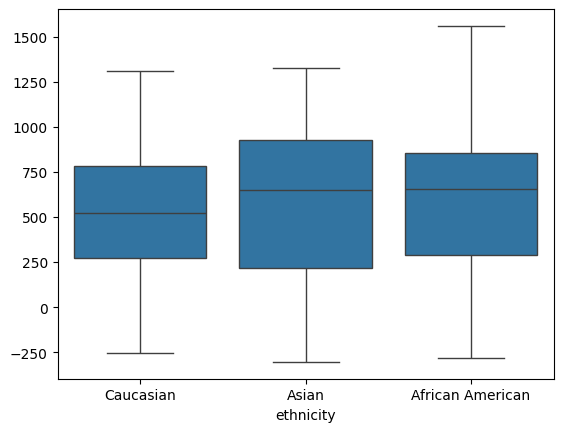

In [8]:
sns.boxplot(x=X_test["ethnicity"], y=y_hat_test)